In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
# ✅ Step 2: Load the dataset
df = pd.read_csv("D:\EDA\DailyDelhiClimateTest.csv")  # real weather data
df['date'] = pd.to_datetime(df['date'])         # convert date column to datetime
df.set_index('date', inplace=True)   

In [5]:
# ✅ Step 3: Select the column we want to predict
data = df['meantemp'].values.reshape(-1, 1)      # temperature column

# ✅ Step 4: Normalize the data (important for LSTM)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
# ✅ Step 5: Create sequences for time series (X = past 30 days, y = next day)
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])     # 30 days
        labels.append(data[i + seq_length])          # next day
    return np.array(sequences), np.array(labels)

seq_length = 30
X, y = create_sequences(data_scaled, seq_length)

In [7]:
# ✅ Step 6: Split into training and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
# ✅ Step 7: Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),  # 1st LSTM layer
    LSTM(50),                                                      # 2nd LSTM layer
    Dense(1)                                                       # Output layer
])

C:\Users\VAISHANAVI\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# ✅ Step 8: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# ✅ Step 9: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - loss: 0.1539 - val_loss: 0.0173
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0221 - val_loss: 0.0678
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0233 - val_loss: 0.0172
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0180 - val_loss: 0.0300
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0213 - val_loss: 0.0128
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0135 - val_loss: 0.0119
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0144 - val_loss: 0.0116
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0147 - val_loss: 0.0098
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0146 - val_loss: 0.0101
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0134 - val_loss: 0.0110
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0123 - val_loss: 0.0132
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0137 - val_loss: 0.008

In [10]:
# ✅ Step 10: Predict on test data
y_pred = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


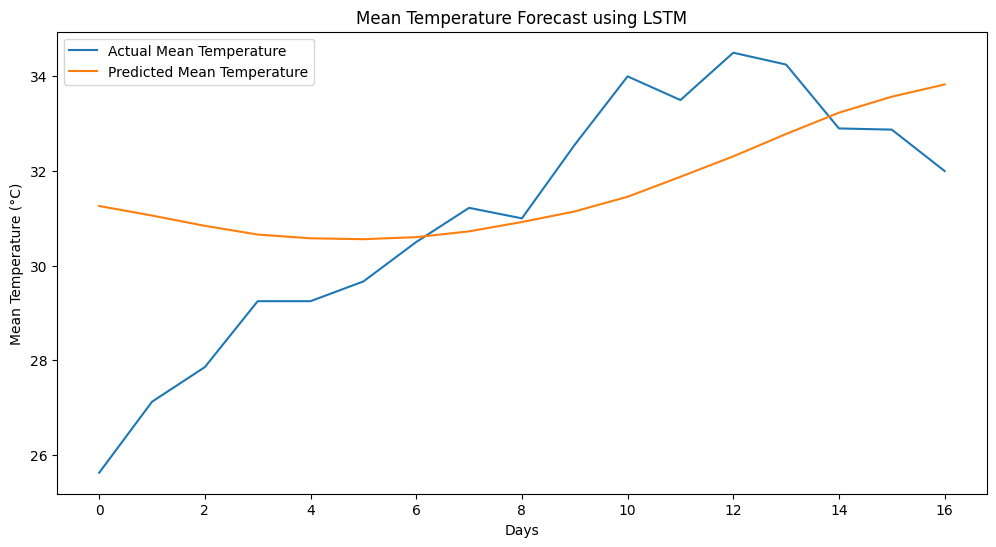

In [11]:
# ✅ Step 11: Reverse scaling to get real temperature values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# ✅ Step 12: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Mean Temperature')
plt.plot(y_pred_inv, label='Predicted Mean Temperature')
plt.xlabel('Days')
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature Forecast using LSTM')
plt.legend()
plt.show()